In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Markov Chain
---

Suppose there are two possible states in a system (e.g., expansion and recession in the economy) and define

$$
 p_{1,t} = \Pr\{\text{State 1 in period } t \},\quad
 p_{2,t} = \Pr\{\text{State 2 in period } t \},
$$

and

$$
 \pi_{ij} = \Pr\{\text{State } i \text{ in period } t+1|\text{State } j \text{ in period } t\}.
$$

Then the Markov chain is defined as

$$
 \begin{bmatrix} p_{1,t+1} \\ p_{2,t+1} \end{bmatrix}
 =
 \begin{bmatrix}
  \pi_{11} & \pi_{12} \\
  \pi_{21} & \pi_{22} 
 \end{bmatrix}
 \begin{bmatrix} p_{1,t} \\ p_{2,t} \end{bmatrix}.
$$

In general, the Markov chain with $k$ states is given by

$$
 \underbrace{\begin{bmatrix} p_{1,t+1} \\ \vdots \\ p_{k,t+1} \end{bmatrix}}_{p_{t+1}}
 =
 \underbrace{\begin{bmatrix}
  \pi_{11} & \cdots & \pi_{1k} \\
  \vdots & \ddots & \vdots \\
  \pi_{k1} & \cdots & \pi_{kk} 
 \end{bmatrix}}_{\Pi}
 \underbrace{\begin{bmatrix} p_{1,t} \\ \vdots \\ p_{k,t} \end{bmatrix}}_{p_t}.
$$

---

#### Numerical Example 1

$$
 \Pi = \begin{bmatrix}
  0.9 & .0.25 \\
  0.1 & 0.75 
 \end{bmatrix},\quad
 p_0 = \begin{bmatrix} 0.5 \\ 0.5 \end{bmatrix}.
$$

In [2]:
transition_matrix = np.array([[0.9, 0.25], [0.1, 0.75]])

In [3]:
print(transition_matrix)

[[0.9  0.25]
 [0.1  0.75]]


In [4]:
initial_probability = np.array([0.5, 0.5])

In [5]:
print(initial_probability)

[0.5 0.5]


The Markov chain evolves as
$$
 p_{t+1} = \Pi p_t,\quad t = 0,1,\dots,
$$

In [6]:
def markov_chains(transition_matrix, initial_probability, iterations):
    k = initial_probability.size
    markov_chain = np.empty((iterations + 1, k))
    state_probability = initial_probability
    markov_chain[0, :] = state_probability
    for t in range(1, iterations + 1):
        state_probability = transition_matrix @ state_probability
        markov_chain[t, :] = state_probability
    return markov_chain

In [7]:
markov_chain = markov_chains(transition_matrix, initial_probability, 10)
print(markov_chain)

[[0.5        0.5       ]
 [0.575      0.425     ]
 [0.62375    0.37625   ]
 [0.6554375  0.3445625 ]
 [0.67603437 0.32396563]
 [0.68942234 0.31057766]
 [0.69812452 0.30187548]
 [0.70378094 0.29621906]
 [0.70745761 0.29254239]
 [0.70984745 0.29015255]
 [0.71140084 0.28859916]]


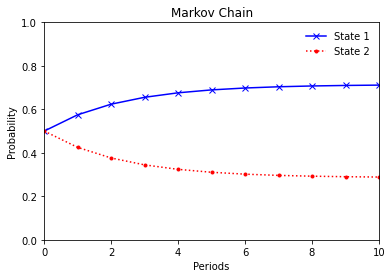

In [8]:
fig1 = plt.figure(num=1, facecolor='w')
periods = np.linspace(0, markov_chain.shape[0] - 1, markov_chain.shape[0])
plt.plot(periods, markov_chain[:, 0], 'b-x', label='State 1')
plt.plot(periods, markov_chain[:, 1], 'r:.', label='State 2')
plt.xlim((periods.min(), periods.max()))
plt.ylim((0, 1))
plt.title('Markov Chain')
plt.xlabel('Periods')
plt.ylabel('Probability')
plt.legend(loc='best', frameon=False)
# plt.savefig('ms_fig_markovchain1.png', dpi=600)
plt.show()

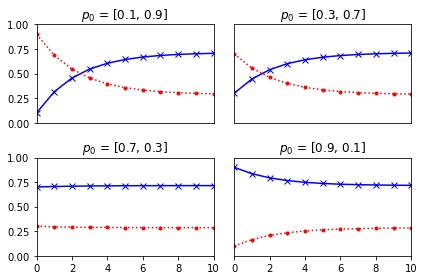

In [9]:
fig2 = plt.figure(num=2, facecolor='w')
init_prob = np.array([[0.1, 0.9], [0.3, 0.7], [0.7, 0.3], [0.9, 0.1]])
for i in range(4):
    markov_chain_i = markov_chains(transition_matrix, init_prob[i, :], 10)
    plt.subplot(2, 2, i+1)
    plt.plot(periods, markov_chain_i[:, 0], 'b-x', label='State 1')
    plt.plot(periods, markov_chain_i[:, 1], 'r:.', label='State 2')
    plt.xlim((periods.min(), periods.max()))
    plt.ylim((0, 1))
    if i == 0 or i == 1:
        plt.xticks([])
    if i == 1 or i == 3:
        plt.yticks([])
    plt.title('$p_0$ = [{0:<3.1f}, {1:<3.1f}]'.format(init_prob[i, 0], init_prob[i, 1]))
plt.tight_layout()
# plt.savefig('ms_fig_markovchain2.png', dpi=600)
plt.show()

---

#### Stationary Distribution of a Markov Chain

The stationary distribution $p^*$ satisfies

$$
 p^* = \Pi p^*.
$$

In case of $k=2$, we can derive an explicit formula of $p^*$:

$$
 p_1^* = \frac{1-\pi_{22}}{2-\pi_{11}-\pi_{22}},\quad
 p_2^* = \frac{1-\pi_{11}}{2-\pi_{11}-\pi_{22}}.
$$


In [10]:
stationary_distribution = np.array([1.0 - transition_matrix[1, 1], 1.0 - transition_matrix[0, 0]]) \
                          / (2.0 - transition_matrix[0, 0] - transition_matrix[1, 1])

In [11]:
print(stationary_distribution)

[0.71428571 0.28571429]


---

#### Numerical Example 2

$$
    \Pi = \begin{bmatrix}
      0.9 & 0.1 & 0 & 0 \\
      0.1 & 0.9 & 0 & 0 \\
      0 & 0 & 0.2 & 0.8 \\
      0 & 0 & 0.8 & 0.2
      \end{bmatrix},\quad
    p_{0}^{1} = \begin{bmatrix} 0.2 \\ 0.8 \\ 0 \\ 0 \end{bmatrix},\quad
    p_{0}^{2} = \begin{bmatrix} 0.1 \\ 0.4 \\ 0.4 \\ 0.1 \end{bmatrix},\quad
    p_{0}^{3} = \begin{bmatrix} 0.0 \\ 0.0 \\ 0.2 \\ 0.8 \end{bmatrix}.
$$

In [12]:
transition_matrix = np.array([[0.9, 0.1, 0.0, 0.0],
                              [0.1, 0.9, 0.0, 0.0],
                              [0.0, 0.0, 0.2, 0.8],
                              [0.0, 0.0, 0.8, 0.2],
                             ])
initial_probability1 = np.array([0.2, 0.8, 0.0, 0.0])
initial_probability2 = np.array([0.1, 0.4, 0.4, 0.1])
initial_probability3 = np.array([0.0, 0.0, 0.2, 0.8])
iterations = 20
periods = np.linspace(0, iterations, iterations + 1)

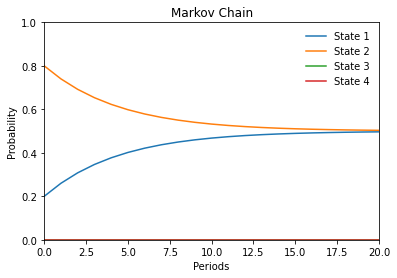

In [13]:
plt.plot(periods, markov_chains(transition_matrix, initial_probability1, iterations))
plt.xlim((periods.min(), periods.max()))
plt.ylim((0, 1))
plt.title('Markov Chain')
plt.xlabel('Periods')
plt.ylabel('Probability')
plt.legend(['State 1','State 2', 'State 3', 'State 4'], loc='best', frameon=False)
plt.show()

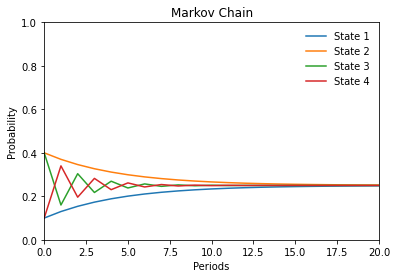

In [14]:
plt.plot(periods, markov_chains(transition_matrix, initial_probability2, iterations))
plt.xlim((periods.min(), periods.max()))
plt.ylim((0, 1))
plt.title('Markov Chain')
plt.xlabel('Periods')
plt.ylabel('Probability')
plt.legend(['State 1','State 2', 'State 3', 'State 4'], loc='best', frameon=False)
plt.show()

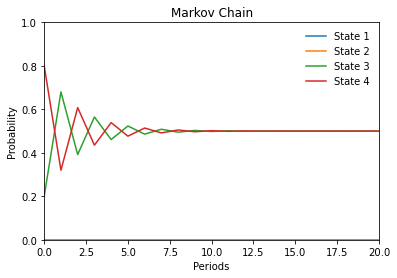

In [15]:
plt.plot(periods, markov_chains(transition_matrix, initial_probability3, iterations))
plt.xlim((periods.min(), periods.max()))
plt.ylim((0, 1))
plt.title('Markov Chain')
plt.xlabel('Periods')
plt.ylabel('Probability')
plt.legend(['State 1','State 2', 'State 3', 'State 4'], loc='best', frameon=False)
plt.show()